In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import shutil
import glob
import zipfile

In [55]:
!unzip /content/PCOS.zip

Archive:  /content/PCOS.zip
   creating: PCOS/infected/
  inflating: PCOS/infected/img_0_1023.jpg  
  inflating: PCOS/infected/img_0_1033.jpg  
  inflating: PCOS/infected/img_0_1071.jpg  
  inflating: PCOS/infected/img_0_1075.jpg  
  inflating: PCOS/infected/img_0_1079.jpg  
  inflating: PCOS/infected/img_0_1083.jpg  
  inflating: PCOS/infected/img_0_1087.jpg  
  inflating: PCOS/infected/img_0_1088.jpg  
  inflating: PCOS/infected/img_0_1099.jpg  
  inflating: PCOS/infected/img_0_113.jpg  
  inflating: PCOS/infected/img_0_1130.jpg  
  inflating: PCOS/infected/img_0_1141.jpg  
  inflating: PCOS/infected/img_0_1142.jpg  
  inflating: PCOS/infected/img_0_1182.jpg  
  inflating: PCOS/infected/img_0_1195.jpg  
  inflating: PCOS/infected/img_0_1223.jpg  
  inflating: PCOS/infected/img_0_1226.jpg  
  inflating: PCOS/infected/img_0_1234.jpg  
  inflating: PCOS/infected/img_0_1257.jpg  
  inflating: PCOS/infected/img_0_126.jpg  
  inflating: PCOS/infected/img_0_1260.jpg  
  inflating: PCOS/infe

In [56]:
ROOT_DIR = '/content/PCOS'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
   print("",dir,"" ,number_of_images[dir])




 notinfected  1143
 infected  781


In [57]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [58]:
def preprocessingImage1(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function= preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [59]:
def preprocessionfImage2(path):
  """
  Input :path
  Output : preprocessed Image
  """
  image_data  = ImageDataGenerator(preprocessing_function= preprocess_input )
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

  


We will split the data such that 
70% for training 
15 % for vailadation
15 % for testing 



In [60]:
def datafolder(path,split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(split * number_of_images[dir])-5),replace=False):
      
          O = os.path.join(ROOT_DIR,dir,img)
          D = os.path.join("./"+path,dir)
          shutil.copy(O,D)
          os.remove(O)

  else:
     print("Folder already exist")


In [61]:
datafolder("train",0.7)

In [62]:
datafolder("val",0.15)

In [63]:
datafolder("test",0.15)

In [64]:
path ='/content/train'
train_data = preprocessingImage1(path)

Found 1336 images belonging to 2 classes.


In [65]:
path ='/content/test'
test_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.


In [66]:
path = '/content/val'
val_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.




Model Block




In [68]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
import keras

In [16]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [27]:
for layer in base_model.layers:
  layer.trainable = False

In [30]:
x= Flatten()(base_model.output)
x= Dense(units=1,activation='sigmoid')(x)

In [31]:
model = Model(base_model.input,x)

In [70]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [73]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc = ModelCheckpoint(filepath="bestmodel.h5",monitor='val_accuracy',verbose=1,save_best_only=True)

#Early check points
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1)

cb = [mc,es]

In [74]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=16,
                          callbacks=cb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.5717 - accuracy: 0.8625


Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to bestmodel.h5
10/10 [==============================] - 30s 3s/step - loss: 1.5717 - accuracy: 0.8625 - val_loss: 4.7749e-04 - val_accuracy: 1.0000
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000    

10/10 [==============================] - 17s 2s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.7808e-07 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 1.7808e-07 - accuracy: 1.0000
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 5.1658e-05 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 5.1658e-05 - accuracy: 1.0000
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 2.6552e-04 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 2.6552e-04 - accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 1.2110e-08 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 1.2110e-08 - accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 3.6037e-07 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 3.6037e-07 - accuracy: 1.0000
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 2.0642e-08 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 2.0642e-08 - accuracy: 1.0000
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 2.1441e-07 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 2.1441e-07 - accuracy: 1.0000
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 1.1665e-08 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 1.1665e-08 - accuracy: 1.0000
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 2.4792e-07 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 2.4792e-07 - accuracy: 1.0000
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 7.3932e-07 - accuracy: 1.0000

10/10 [==============================] - 15s 2s/step - loss: 7.3932e-07 - accuracy: 1.0000
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 2.8616e-07 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 2.8616e-07 - accuracy: 1.0000
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 6.1263e-08 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 6.1263e-08 - accuracy: 1.0000
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 1.5090e-06 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 1.5090e-06 - accuracy: 1.0000
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 5.9374e-09 - accuracy: 1.0000

10/10 [==============================] - 15s 2s/step - loss: 5.9374e-09 - accuracy: 1.0000
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 3.9584e-07 - accuracy: 1.0000

10/10 [==============================] - 16s 1s/step - loss: 3.9584e-07 - accuracy: 1.0000
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 3.8728e-07 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 3.8728e-07 - accuracy: 1.0000
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 2.4703e-08 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 2.4703e-08 - accuracy: 1.0000
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 5.8225e-08 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 5.8225e-08 - accuracy: 1.0000
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 8.7165e-09 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 8.7165e-09 - accuracy: 1.0000
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 1.5480e-08 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 1.5480e-08 - accuracy: 1.0000
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9937    

10/10 [==============================] - 16s 2s/step - loss: 0.0098 - accuracy: 0.9937
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 1.1101 - accuracy: 0.9531

10/10 [==============================] - 15s 1s/step - loss: 1.1101 - accuracy: 0.9531
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 1.5775e-08 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 1.5775e-08 - accuracy: 1.0000
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 1.3545e-09 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 1.3545e-09 - accuracy: 1.0000
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 4.0813e-11 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 4.0813e-11 - accuracy: 1.0000
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 1.6309e-10 - accuracy: 1.0000

10/10 [==============================] - 16s 1s/step - loss: 1.6309e-10 - accuracy: 1.0000
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 1.2753e-10 - accuracy: 1.0000

10/10 [==============================] - 15s 1s/step - loss: 1.2753e-10 - accuracy: 1.0000
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 1.0610e-10 - accuracy: 1.0000

10/10 [==============================] - 16s 2s/step - loss: 1.0610e-10 - accuracy: 1.0000


In [75]:
model = load_model("/content/bestmodel.h5")

In [76]:
acc = model.evaluate_generator(test_data)[1]
print(f"our model accuracy is  {acc * 100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


our model accuracy is  100.0 %


 Our model is perform well on the datasets.

The accuracy is 100.0 %

In [77]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [99]:
train_data.class_indices

{'infected': 0, 'notinfected': 1}

In [113]:
test_data.class_indices

{'infected': 0, 'notinfected': 1}

In [114]:
val_data.class_indices

{'infected': 0, 'notinfected': 1}

In [133]:
#now get some random images and predict the class
from keras.preprocessing import image
import tensorflow as tf


def predictimage(path):
       
      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model.predict(input_arr)
      if pred == 1:
          print("Not Affected")
      else :
         print("Affected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

1/1 [==============================] - 0s 74ms/step
Affected


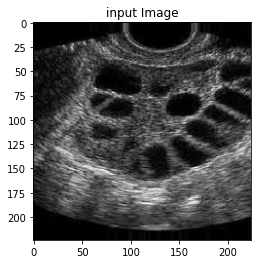

In [134]:
#It is the infected image sample
predictimage("/content/PCOS/infected/img_0_113.jpg") 

1/1 [==============================] - 0s 72ms/step
Not Affected


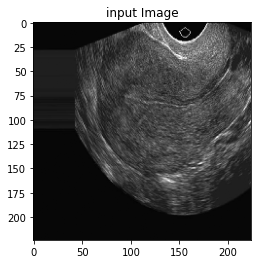

In [135]:
#It is the not affected sample images
predictimage("/content/PCOS/notinfected/img_0_6858.jpg")

1/1 [==============================] - 0s 70ms/step
Not Affected


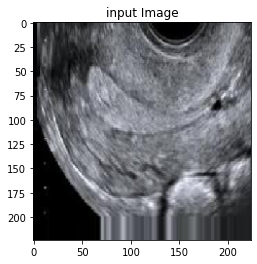

In [136]:
#not infected image

predictimage("/content/PCOS/notinfected/img_0_1772.jpg")

1/1 [==============================] - 0s 72ms/step
Affected


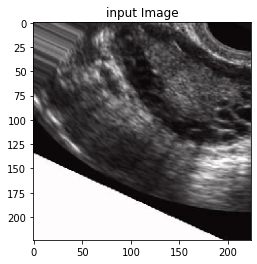

In [137]:
predictimage("/content/PCOS/infected/img_0_9985.jpg")